In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.signal as signal
import lib.io.stan
import numpy as np
from matplotlib.lines import Line2D
import os

In [3]:
results_dir = 'results/exp10/exp10.20'
data_dir = 'datasets/id002_cj'
os.makedirs(f'{results_dir}/Rfiles', exist_ok=True)
os.makedirs(f'{results_dir}/figures', exist_ok=True)
os.makedirs(f'{results_dir}/logs', exist_ok=True)
sim_out_ground_truth = lib.io.stan.read_samples(
                        [f'{results_dir}/sim_out_ground_truth.csv'])
fit_data = np.load(f'{data_dir}/CJ_fit_trgt.npz')

In [4]:
slp_sim_ground_truth = sim_out_ground_truth['slp'][0,...]
slp_true = fit_data['fit_trgt'][0:-1:20,:]
nt, ns = slp_true.shape
data = {'nt':nt, 'ns':ns, 'slp_sim_ground_truth':slp_sim_ground_truth,
        'slp_true':slp_true}
lib.io.stan.rdump(f'{results_dir}/Rfiles/fit_data_optim_amp_offset.R',data)

In [8]:
%%bash -s "$results_dir"

RESULTS_DIR=$1
stancompile.sh vep-optim-amp-offset

for i in {1..4};
do
./vep-optim-amp-offset optimize \
data file=${RESULTS_DIR}/Rfiles/fit_data_optim_amp_offset.R \
output file=${RESULTS_DIR}/optim_amp_offset_run${i}.csv \
&> ${RESULTS_DIR}/logs/optim_amp_offset_run${i}.log &
done

/home/anirudh/Academia/projects/vep.stan
make: '/home/anirudh/Academia/projects/vep.stan/vep-optim-amp-offset' is up to date.


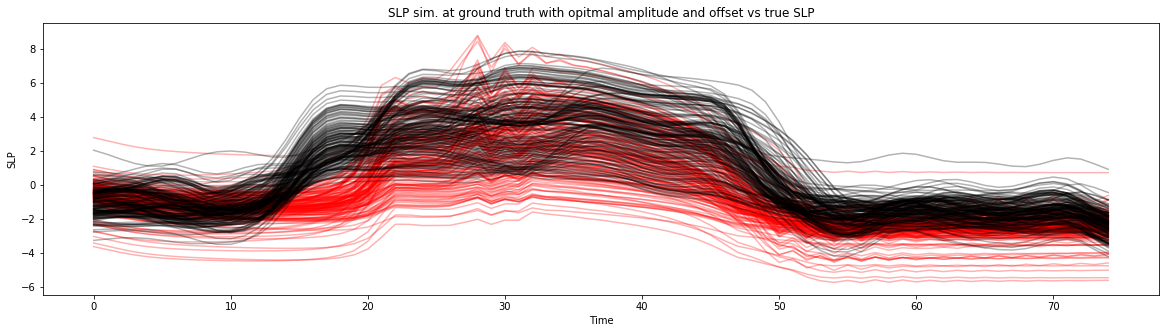

In [13]:
offset = -3.302963
amplitude = 4.41035
plt.figure(figsize=(20,5))
plt.plot(amplitude*(slp_sim_ground_truth+offset), color='red', alpha=0.3);
plt.plot(slp_true, color='black', alpha=0.3);
plt.xlabel('Time')
plt.ylabel('SLP')
plt.title('SLP sim. at ground truth with opitmal amplitude and offset vs true SLP')
plt.savefig(f'{results_dir}/figures/SLP_comparison_optim_amp_offset.png')